# Analysis of Sample Exoplanets Data

This project focuses on the use of applications python and primarily SQL in order to assess a sample dataset of exoplanets, given by data gathered by the NASA Exoplanet Archive, with the dataset itself retrieved from Kaggle (http://exoplanetarchive.ipac.caltech.edu).

The dataset contains variables pertaining to the exoplanets (mass, distance, orbital period etc.) along with information on the host stars (the stars which the exoplanets orbit). The primary goal for this project is to take the sample from the dataset, build a database with various attributes and foreign tables, and produce some basic to intermediate queries which acts as an exploration analysis. This is accomplished primarily through SQL queries.

There is an entity relationship diagram, which pieces together the connections between variables, followed by the connecting of the database itself through pymysql. Thereafter, several queries are shown, along with a final section which adds a new column to the database, based on a given condition.

## Part 1: Entity Relationship Diagram

An entity relationship diagram is a visual representation of the relationships between entities, variables and attributes. Such visual representations often include cardinality and ordinality, which refers to the specification of numerical attributes pertaining to the relationship and the mandatory/optional aspect of the relationship, respectively.

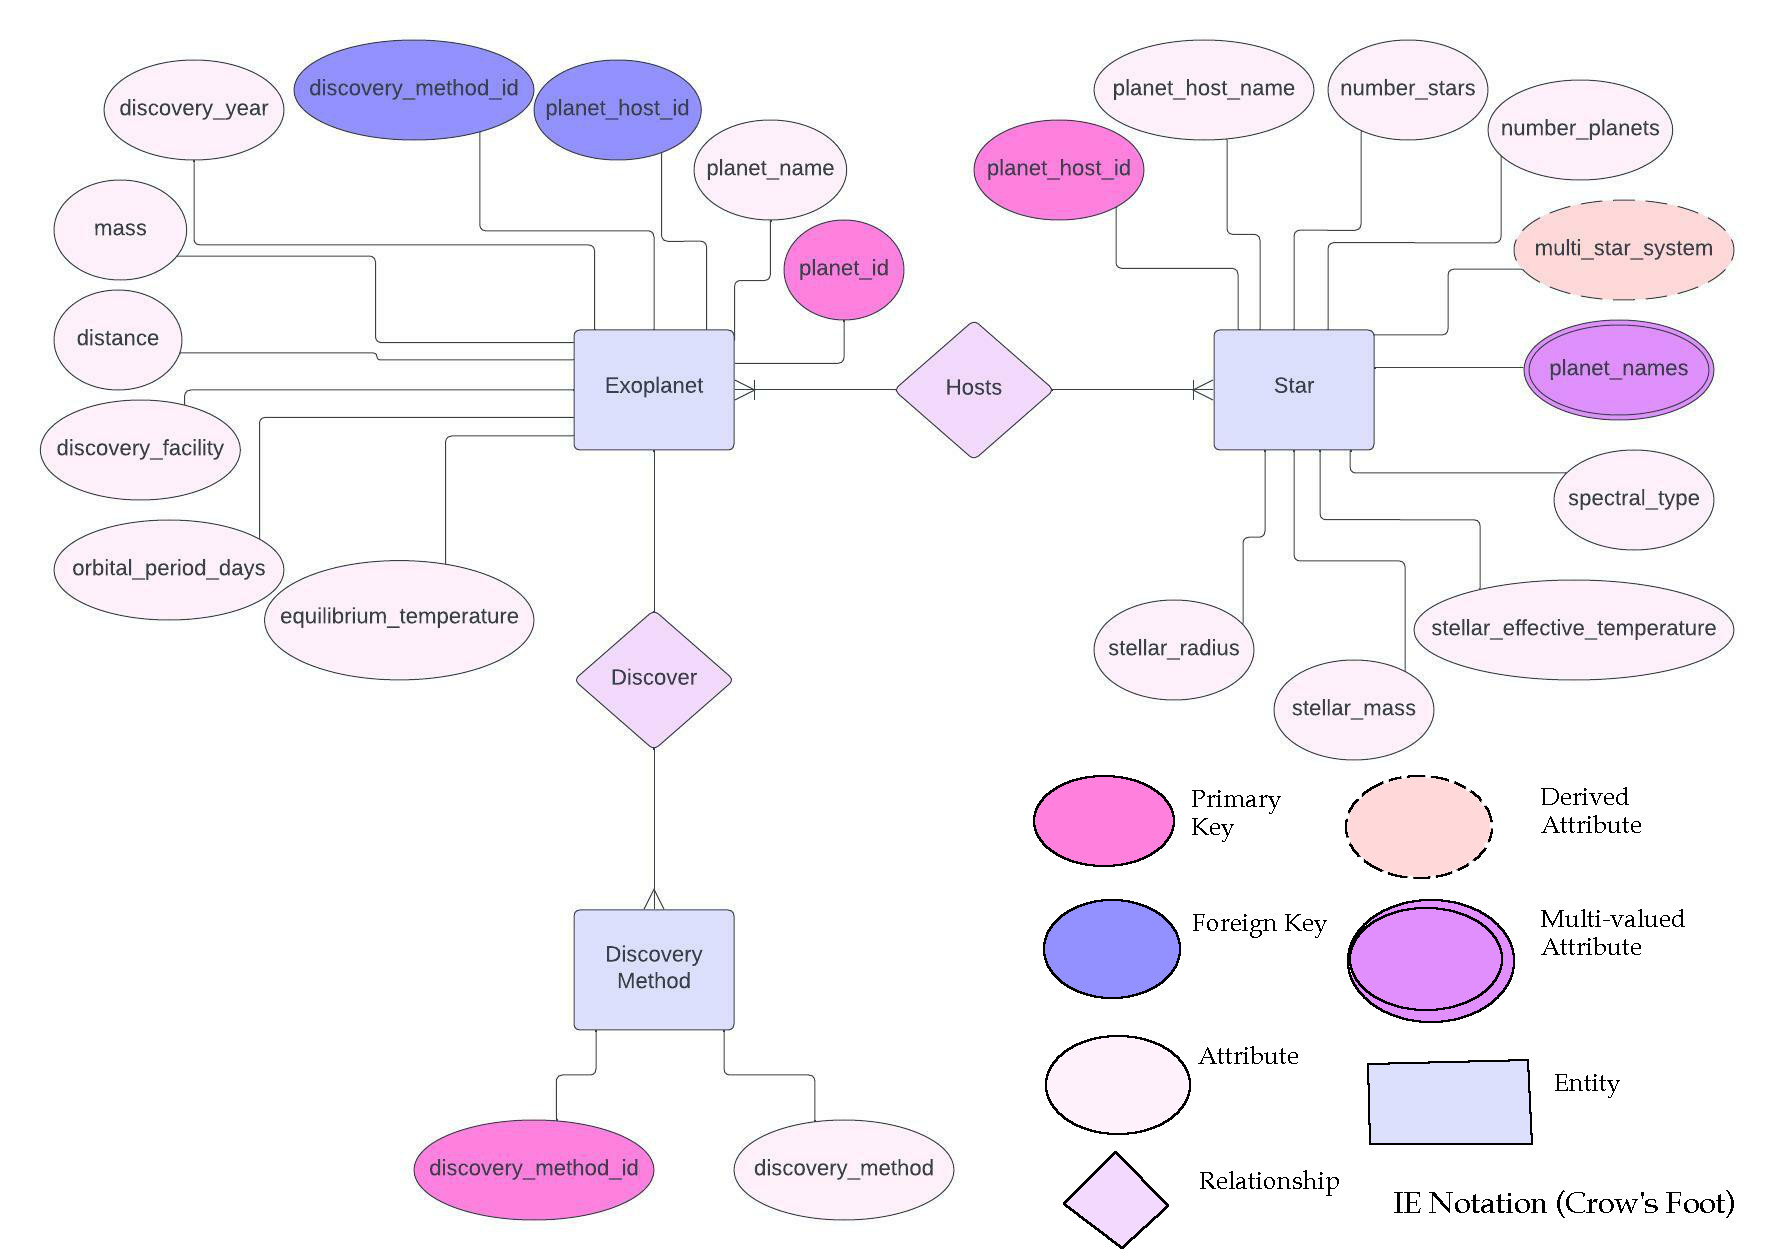

## Part 2: Connecting to the Database

The database that is being connected exists locally and is written in the PopSQL application using MySQL. This database will be connected with the client library pymysql.

In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mydb=pymysql.connect(host='localhost',port=int(3306),user='root',password='password',db='exoplanets')

In [3]:
# View exoplanets table
pd.read_sql_query("SELECT * FROM exoplanets",mydb)

,planet_id,planet_name,discovery_year,mass,distance,discovery_facility,orbital_period_days,equilibrium_temperature,discovery_method_id,planet_host_id
0,1,KOI-351 b,2013,NaN,848.24500,Kepler,7.008150,NaN,1,1
1,2,KOI-351 c,2013,NaN,848.24500,Kepler,8.719370,NaN,1,1
2,3,KOI-351 d,2013,NaN,848.24500,Kepler,59.736700,NaN,1,1
3,4,KOI-351 e,2013,NaN,848.24500,Kepler,91.939100,NaN,1,1
4,5,KOI-351 f,2013,NaN,848.24500,Kepler,124.914000,NaN,1,1
5,6,KOI-351 g,2013,NaN,848.24500,Kepler,210.607000,NaN,1,1
6,7,KOI-351 h,2013,NaN,848.24500,Kepler,331.601000,NaN,1,1
7,8,KOI-351 i,2017,NaN,848.24500,Kepler,14.449100,709.0,1,1
8,9,Kepler-11 b,2010,1.900,646.34600,Kepler,10.303900,NaN,1,2
9,10,Kepler-11 c,2010,2.900,646.34600,Kepler,13.024100,NaN,1,2


In [4]:
# View discovery methods table
pd.read_sql_query("SELECT * FROM discovery_method_table",mydb)

,discovery_method_id,discovery_method
0,1,Transit
1,2,Imaging
2,3,Radial Velocity


In [5]:
# View host stars table
pd.read_sql_query("SELECT * FROM host_stars",mydb)

,planet_host_id,planet_host_name,number_stars,number_planets,spectral_type,stellar_effective_temperature,stellar_mass,stellar_radius,planet_names,multi_star_system
0,1,KOI-351,1,8,None,6080.0,1.20,1.20,"KOI-351 b,KOI-351 c,KOI-351 d,KOI-351 e,KOI-35...",no
1,2,Kepler-11,1,6,None,5663.0,0.96,1.06,"Kepler-11 b,Kepler-11 c,Kepler-11 d,Kepler-11 ...",no
2,3,51 Eri,3,1,F0 IV,NaN,1.75,NaN,51 Eri b,yes
3,4,6 Lyn,1,1,None,4938.0,1.44,5.20,6 Lyn b,no
4,5,TOI-561,1,5,G9 V,5455.0,0.79,0.85,"TOI-561 b,TOI-561 c,TOI-561 d,TOI-561 e,TOI-561 f",no
5,6,ups And,2,3,F8 V,NaN,1.30,1.56,"ups And b, ups And c, ups And d",yes
6,7,7 CMa,1,2,None,4826.0,1.34,4.87,"7 CMa b, 7CMa c",no
7,8,17 Sco,1,1,K3 III,4157.0,1.22,25.92,17 Sco b,no
8,9,XO-5,1,1,None,5430.0,1.04,1.13,XO-5 b,no
9,10,WASP-37,1,1,None,5800.0,0.93,1.00,WASP-37 b,no


## Part 3: Query Analysis 

In this query analysis, we will go through some basic and intermediate queries pertaining to the 3 tables in the database: the exoplanets, discovery methods and host stars. Variables within the tables will be taken into consideration to garner general insights in combination with SQL querying techniques such as wildcards, nesting and unions.

### Query Analysis I: Exoplanets

###### Select all planet names; order in descending order

In [6]:
pd.read_sql_query("SELECT exoplanets.planet_name FROM exoplanets ORDER BY planet_name DESC",mydb)

,planet_name
0,YSES 2 b
1,XO-5 b
2,WASP-37 b
3,ups And d
4,ups And c
5,ups And b
6,TOI-561 f
7,TOI-561 e
8,TOI-561 d
9,TOI-561 c


###### Select all planets discovered b/w the year 2018 and 2021 and order by planet name

In [7]:
pd.read_sql_query("SELECT exoplanets.planet_name, exoplanets.discovery_year FROM exoplanets WHERE exoplanets.discovery_year >=2018 AND exoplanets.discovery_year <= 2021 ORDER BY planet_name",mydb)

,planet_name,discovery_year
0,17 Sco b,2020
1,7 CMa c,2019
2,bet Pic c,2019
3,TOI-561 b,2020
4,TOI-561 c,2020
5,TOI-561 d,2020
6,TOI-561 e,2020
7,TOI-561 f,2020
8,YSES 2 b,2021


###### Select all planet names along with their discovery year; rename the columns

In [8]:
pd.read_sql_query("SELECT exoplanets.planet_name AS name_planet, exoplanets.discovery_year AS year_of_discovery FROM exoplanets",mydb)

,name_planet,year_of_discovery
0,KOI-351 b,2013
1,KOI-351 c,2013
2,KOI-351 d,2013
3,KOI-351 e,2013
4,KOI-351 f,2013
5,KOI-351 g,2013
6,KOI-351 h,2013
7,KOI-351 i,2017
8,Kepler-11 b,2010
9,Kepler-11 c,2010


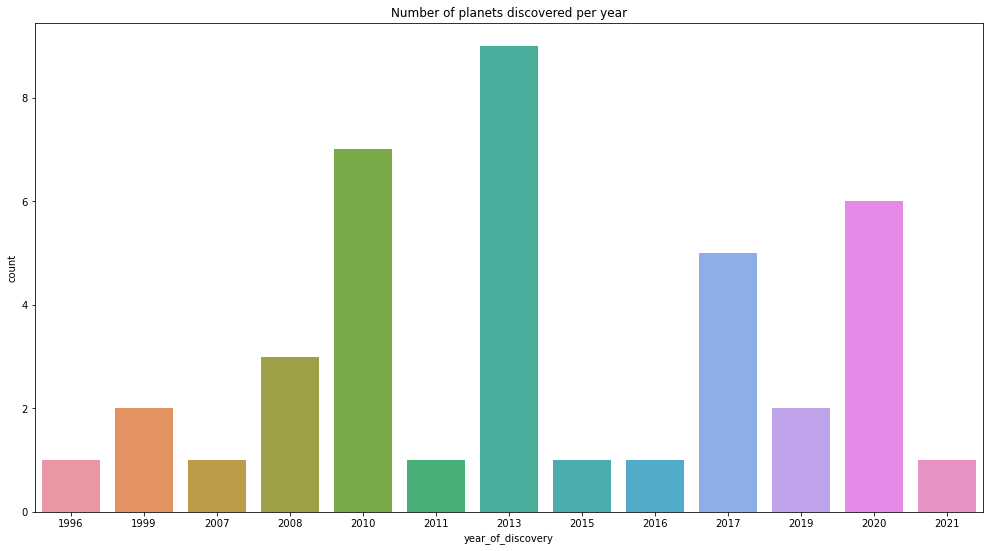

In [9]:
df = pd.read_sql_query("SELECT exoplanets.planet_name AS name_planet, exoplanets.discovery_year AS year_of_discovery FROM exoplanets",mydb)
fig,ax=plt.subplots(figsize=(17,9))
sns.countplot(x='year_of_discovery',data=df,ax=ax).set(title='Number of planets discovered per year')
plt.show()

###### Get value counts for the discovery facility

In [10]:
pd.read_sql_query("SELECT COUNT(exoplanets.discovery_facility), exoplanets.discovery_facility FROM exoplanets GROUP BY exoplanets.discovery_facility ORDER BY COUNT(exoplanets.discovery_facility) DESC",mydb)

,COUNT(exoplanets.discovery_facility),discovery_facility
0,15,Kepler
1,7,Multiple Observatories
2,5,Transiting Exoplanet Survey Satellite (TESS)
3,3,Lick Observatory
4,3,Paranal Observatory
5,2,Okayama Astrophysical Observatory
6,1,Gemini Observatory
7,1,Anglo-Australian Telescope
8,1,XO
9,1,SuperWASP


###### Count number of planets whose orbital pd < 10

In [11]:
pd.read_sql_query("SELECT COUNT(exoplanets.planet_id) FROM exoplanets WHERE orbital_period_days < 10",mydb)

,COUNT(exoplanets.planet_id)
0,6


###### Find planets whose orbital pd > 365

In [12]:
pd.read_sql_query("SELECT exoplanets.planet_name, exoplanets.orbital_period_days FROM exoplanets WHERE orbital_period_days > 365",mydb)

,planet_name,orbital_period_days
0,6 Lyn b,934.30
1,ups And d,1276.46
2,7 CMa b,735.10
3,7 CMa c,996.00
4,17 Sco b,578.38
5,bet Pic b,7665.00
6,bet Pic c,1200.00
7,tau Cet f,636.13


###### Find min orbital period

In [13]:
pd.read_sql_query("SELECT MIN(exoplanets.orbital_period_days) AS minimum_orbital_period FROM exoplanets",mydb)

,minimum_orbital_period
0,0.446578


###### Find max orbital period

In [14]:
pd.read_sql_query("SELECT MAX(exoplanets.orbital_period_days) AS maximum_orbital_period FROM exoplanets",mydb)

,maximum_orbital_period
0,7665.0


###### Find min for orbital period along with the respective planet name

In [15]:
pd.read_sql_query("SELECT planet_name, orbital_period_days FROM exoplanets WHERE orbital_period_days IS NOT NULL ORDER BY orbital_period_days ASC LIMIT 1",mydb)

,planet_name,orbital_period_days
0,TOI-561 b,0.446578


###### Find max for orbital period along with the respective planet name

In [16]:
pd.read_sql_query("SELECT planet_name, orbital_period_days FROM exoplanets WHERE orbital_period_days IS NOT NULL ORDER BY orbital_period_days DESC LIMIT 1",mydb)

,planet_name,orbital_period_days
0,bet Pic b,7665.0


###### Find the average mass of the exoplanets

In [17]:
pd.read_sql_query("SELECT AVG(exoplanets.mass) as average_exoplanet_mass FROM exoplanets",mydb)

,average_exoplanet_mass
0,618.106647


###### Find the average distance of the exoplanets

In [18]:
pd.read_sql_query("SELECT AVG(distance) AS average_exoplanet_distance FROM exoplanets",mydb)

,average_exoplanet_distance
0,334.660184


###### Find the average orbital period for planet_host_id=1

In [19]:
pd.read_sql_query("SELECT AVG(orbital_period_days) FROM exoplanets AS average_orbital_period WHERE planet_host_id=1;",mydb)

,AVG(orbital_period_days)
0,106.1218


###### Find the top 10 planets with longest orbital period

In [20]:
pd.read_sql_query("SELECT planet_name, orbital_period_days FROM exoplanets ORDER BY orbital_period_days DESC LIMIT 10",mydb)

,planet_name,orbital_period_days
0,bet Pic b,7665.000
1,ups And d,1276.460
2,bet Pic c,1200.000
3,7 CMa c,996.000
4,6 Lyn b,934.300
5,7 CMa b,735.100
6,tau Cet f,636.130
7,17 Sco b,578.380
8,KOI-351 h,331.601
9,ome Ser b,277.020


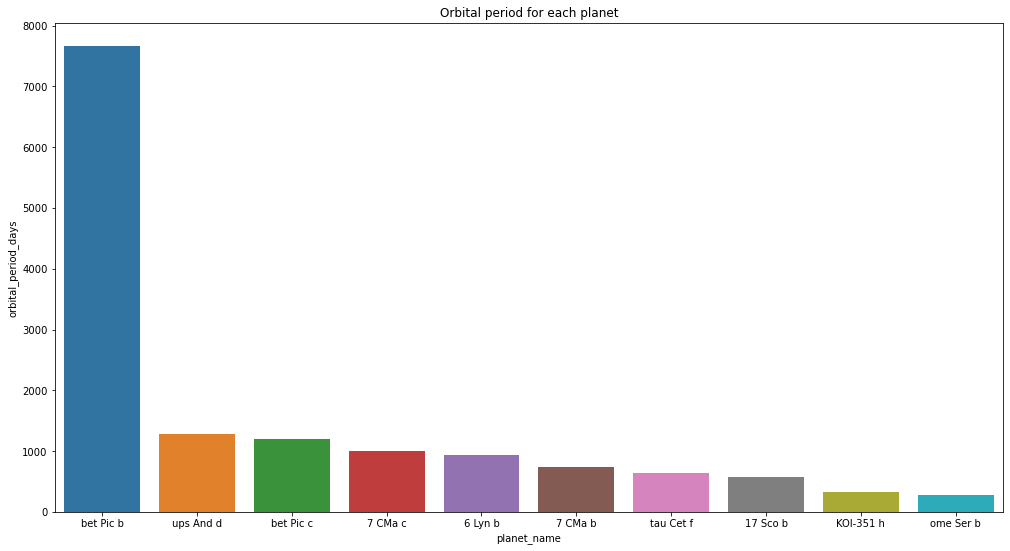

In [21]:
df = pd.read_sql_query("SELECT planet_name, orbital_period_days FROM exoplanets ORDER BY orbital_period_days DESC LIMIT 10",mydb)
fig,ax=plt.subplots(figsize=(17,9))
sns.barplot(x='planet_name',y='orbital_period_days',data=df,ax=ax).set(title='Orbital period for each planet')
plt.show()

###### Find value counts for discovery method

In [22]:
pd.read_sql_query("SELECT COUNT(discovery_method_id), discovery_method_id FROM exoplanets GROUP BY discovery_method_id",mydb)

,COUNT(discovery_method_id),discovery_method_id
0,22,1
1,4,2
2,14,3


###### Find min for equilibrium temperature

In [23]:
# Find min and max for equilibrium temperature
pd.read_sql_query("SELECT MIN(exoplanets.equilibrium_temperature) FROM exoplanets",mydb)

,MIN(exoplanets.equilibrium_temperature)
0,700.0


###### Find max for equilibrium temperature

In [24]:
# Find min and max for equilibrium temperature
pd.read_sql_query("SELECT MAX(exoplanets.equilibrium_temperature) FROM exoplanets",mydb)

,MAX(exoplanets.equilibrium_temperature)
0,2600.0


### Query Analysis II: Host Stars

###### Find name of planets within solar system with > 1 star

In [25]:
pd.read_sql_query("SELECT exoplanets.planet_name, host_stars.number_stars FROM exoplanets JOIN host_stars ON exoplanets.planet_host_id = host_stars.planet_host_id WHERE host_stars.number_stars > 1 ORDER BY exoplanets.planet_name, host_stars.number_stars DESC",mydb)

,planet_name,number_stars
0,51 Eri b,3
1,91 Aqr b,3
2,ome Ser b,2
3,ups And b,2
4,ups And c,2
5,ups And d,2


###### Find host star name of spectral type containing 'K' (wildcard)

In [26]:
pd.read_sql_query("SELECT planet_host_name, spectral_type FROM host_stars WHERE spectral_type LIKE '%K%'",mydb)

,planet_host_name,spectral_type
0,17 Sco,K3 III
1,YES 2,K1 V
2,91 Aqr,K0 III


###### Obtain list of all exoplanets and discovery methods in dataset (union)

In [27]:
pd.read_sql_query("SELECT planet_name FROM exoplanets UNION SELECT discovery_method FROM discovery_method_table",mydb)

,planet_name
0,KOI-351 b
1,KOI-351 c
2,KOI-351 d
3,KOI-351 e
4,KOI-351 f
5,KOI-351 g
6,KOI-351 h
7,KOI-351 i
8,Kepler-11 b
9,Kepler-11 c


###### Obtain list of all exoplanets and discovery methods in dataset along with planet host name (double union)

In [28]:
pd.read_sql_query("SELECT planet_name FROM exoplanets UNION SELECT discovery_method FROM discovery_method_table UNION SELECT planet_host_name FROM host_stars",mydb)

,planet_name
0,KOI-351 b
1,KOI-351 c
2,KOI-351 d
3,KOI-351 e
4,KOI-351 f
5,KOI-351 g
6,KOI-351 h
7,KOI-351 i
8,Kepler-11 b
9,Kepler-11 c


###### Find list of planets along with discovery method (join)

In [29]:
pd.read_sql_query("SELECT exoplanets.planet_name, discovery_method_table.discovery_method FROM exoplanets JOIN discovery_method_table ON exoplanets.discovery_method_id = discovery_method_table.discovery_method_id",mydb)

,planet_name,discovery_method
0,KOI-351 b,Transit
1,KOI-351 c,Transit
2,KOI-351 d,Transit
3,KOI-351 e,Transit
4,KOI-351 f,Transit
5,KOI-351 g,Transit
6,KOI-351 h,Transit
7,KOI-351 i,Transit
8,Kepler-11 b,Transit
9,Kepler-11 c,Transit


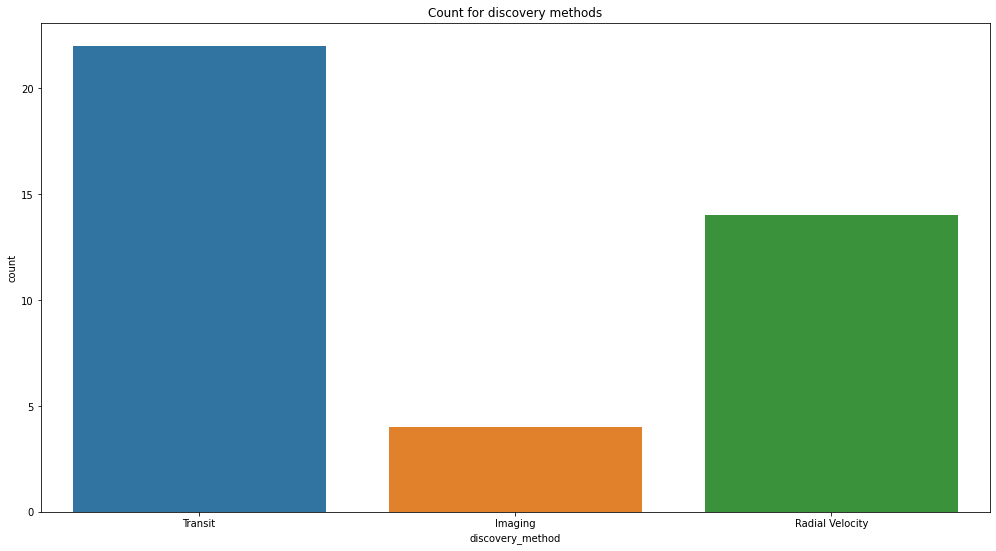

In [30]:
df = pd.read_sql_query("SELECT exoplanets.planet_name, discovery_method_table.discovery_method FROM exoplanets JOIN discovery_method_table ON exoplanets.discovery_method_id = discovery_method_table.discovery_method_id",mydb)
fig,ax=plt.subplots(figsize=(17,9))
sns.countplot(x='discovery_method',data=df,ax=ax).set(title='Count for discovery methods')
plt.show()

###### Find list of planet names along w/ discovery method along w/ host star name (double join)

In [31]:
pd.read_sql_query("SELECT exoplanets.planet_name, discovery_method_table.discovery_method, host_stars.planet_host_name FROM exoplanets JOIN discovery_method_table ON exoplanets.discovery_method_id = discovery_method_table.discovery_method_id JOIN host_stars ON exoplanets.planet_host_id = host_stars.planet_host_id",mydb)

,planet_name,discovery_method,planet_host_name
0,KOI-351 b,Transit,KOI-351
1,KOI-351 c,Transit,KOI-351
2,KOI-351 d,Transit,KOI-351
3,KOI-351 e,Transit,KOI-351
4,KOI-351 f,Transit,KOI-351
5,KOI-351 g,Transit,KOI-351
6,KOI-351 h,Transit,KOI-351
7,KOI-351 i,Transit,KOI-351
8,Kepler-11 b,Transit,Kepler-11
9,Kepler-11 c,Transit,Kepler-11


###### Find average stellar effective temperature; round to 2 decimal places

In [32]:
pd.read_sql_query("SELECT ROUND(AVG(host_stars.stellar_effective_temperature),2) AS 'Average Stellar Effective Temperature' FROM host_stars",mydb)

,Average Stellar Effective Temperature
0,5239.92


###### Find min of stellar radius

In [33]:
pd.read_sql_query("SELECT MIN(host_stars.stellar_radius) FROM host_stars",mydb)

,MIN(host_stars.stellar_radius)
0,0.85


###### Find max of stellar radius

In [34]:
pd.read_sql_query("SELECT MAX(host_stars.stellar_radius) FROM host_stars",mydb)

,MAX(host_stars.stellar_radius)
0,25.92


###### Find min of stellar mass

In [35]:
pd.read_sql_query("SELECT ROUND(MIN(host_stars.stellar_mass),3) AS 'Minimum Stellar Mass' FROM host_stars",mydb)

,Minimum Stellar Mass
0,0.78


###### Find max of stellar mass

In [36]:
pd.read_sql_query("SELECT ROUND(MAX(host_stars.stellar_mass),3) AS 'Maximum Stellar Mass' FROM host_stars",mydb)

,Maximum Stellar Mass
0,2.17


###### Find host star name with planet names containing 'Kepler' (wildcard)

In [37]:
pd.read_sql_query("SELECT host_stars.planet_host_name, host_stars.planet_names FROM host_stars WHERE host_stars.planet_names LIKE '%Kepler%'",mydb)

,planet_host_name,planet_names
0,Kepler-11,"Kepler-11 b,Kepler-11 c,Kepler-11 d,Kepler-11 ..."
1,Kepler-483,Kepler-483 b


###### Find median number of planets in a star system

In [38]:
# Setup: figure out position of the median; figure out what the number should be
pd.read_sql_query("SELECT CEILING((COUNT(planet_host_name))/2) FROM host_stars",mydb)

,CEILING((COUNT(planet_host_name))/2)
0,9.0


In [39]:
# Setup: figure out position of the median; figure out what the number should be
pd.read_sql_query("SELECT number_planets FROM host_stars ORDER BY number_planets DESC",mydb)

,number_planets
0,8
1,6
2,5
3,4
4,3
5,2
6,2
7,1
8,1
9,1


In [40]:
# Setup: figure out position of the median; figure out what the number should be
pd.read_sql_query("SELECT number_stars FROM host_stars ORDER BY number_planets desc LIMIT 8,1",mydb)

,number_stars
0,1


###### Find names of planets whose host star's stellar effective temperature is >5000 (nested query)

In [41]:
# Step 1: get the planet_host_id from host_stars table (>5000)
pd.read_sql_query("SELECT planet_host_id FROM host_stars WHERE stellar_effective_temperature >5000",mydb)

,planet_host_id
0,1
1,2
2,5
3,9
4,10
5,11


In [42]:
# Step 2: get the planet names from exoplanets table; combine w/ previous query
pd.read_sql_query("SELECT exoplanets.planet_name FROM exoplanets WHERE exoplanets.planet_host_id IN (SELECT planet_host_id FROM host_stars WHERE host_stars.stellar_effective_temperature > 5000)",mydb)

,planet_name
0,KOI-351 b
1,KOI-351 c
2,KOI-351 d
3,KOI-351 e
4,KOI-351 f
5,KOI-351 g
6,KOI-351 h
7,KOI-351 i
8,Kepler-11 b
9,Kepler-11 c


###### Find names of planets whose discovery method is 'transit' AND whose stellar radius is b/w 1 and 5 (nested query)

In [43]:
# Step 1: get discovery_method_id from discovery method table (discovery method of 'transit')
pd.read_sql_query("SELECT discovery_method_id FROM discovery_method_table WHERE discovery_method='Transit'",mydb)

,discovery_method_id
0,1


In [44]:
# Step 2: get planet_host_id where stellar radius is b/w 1 and 5 from host_stars table
pd.read_sql_query("SELECT planet_host_id FROM host_stars WHERE stellar_radius >1 AND stellar_radius <5",mydb)

,planet_host_id
0,1
1,2
2,6
3,7
4,9
5,11
6,12


In [45]:
# Step 3: Combine queries above (double nested query)
pd.read_sql_query("SELECT exoplanets.planet_name FROM exoplanets WHERE exoplanets.discovery_method_id IN (SELECT discovery_method_id FROM discovery_method_table WHERE discovery_method='Transit') AND exoplanets.planet_host_id IN (SELECT planet_host_id FROM host_stars WHERE stellar_radius >1 AND stellar_radius <5)",mydb)

,planet_name
0,KOI-351 b
1,KOI-351 c
2,KOI-351 d
3,KOI-351 e
4,KOI-351 f
5,KOI-351 g
6,KOI-351 h
7,KOI-351 i
8,Kepler-11 b
9,Kepler-11 c


###### Find min orbital period for each discovery method

In [46]:
pd.read_sql_query("SELECT MIN(orbital_period_days), discovery_method_id FROM exoplanets GROUP BY discovery_method_id ORDER BY discovery_method_id",mydb)

,MIN(orbital_period_days),discovery_method_id
0,0.446578,1
1,7665.000000,2
2,4.617030,3


###### Find max orbital period for each discovery method

In [47]:
pd.read_sql_query("SELECT MAX(orbital_period_days), discovery_method_id FROM exoplanets GROUP BY discovery_method_id ORDER BY discovery_method_id",mydb)

,MAX(orbital_period_days),discovery_method_id
0,331.601,1
1,7665.000,2
2,1276.460,3


###### Find min orbital period for each discovery year

In [48]:
pd.read_sql_query("SELECT MIN(orbital_period_days) AS 'Minimum Orbital Period', discovery_year AS 'Discovery Year' FROM exoplanets GROUP BY discovery_year ORDER BY discovery_year",mydb)

,Minimum Orbital Period,Discovery Year
0,4.617030,1996
1,241.258000,1999
2,NaN,2007
3,4.187760,2008
4,3.577470,2010
5,735.100000,2011
6,7.008150,2013
7,NaN,2015
8,30.229100,2016
9,14.449100,2017


###### Find max orbital period for each discovery year

In [49]:
pd.read_sql_query("SELECT MAX(orbital_period_days) AS 'Maximum Orbital Period', discovery_year AS 'Discovery Year' FROM exoplanets GROUP BY discovery_year ORDER BY discovery_year",mydb)

,Maximum Orbital Period,Discovery Year
0,4.61703,1996
1,1276.46000,1999
2,NaN,2007
3,7665.00000,2008
4,118.38100,2010
5,735.10000,2011
6,331.60100,2013
7,NaN,2015
8,30.22910,2016
9,636.13000,2017


### Query Analysis III: Creating New Column

This section will add a column to the database based on a given condition.

###### Create column in database based on if it's a multistar system

In [50]:
# Method 1: new column isn't added to the table; creates separate table query
pd.read_sql_query("SELECT host_stars.number_stars, (CASE WHEN host_stars.number_stars >1 THEN 'yes' ELSE 'no' END) AS multi_star_system FROM host_stars",mydb)

,number_stars,multi_star_system
0,1,no
1,1,no
2,3,yes
3,1,no
4,1,no
5,2,yes
6,1,no
7,1,no
8,1,no
9,1,no


In [ ]:
# Method 2: Adds the new column to the database
pd.read_sql_query("ALTER TABLE host_stars ADD multi_star_system VARCHAR(3) AS (CASE WHEN host_stars.number_stars > 1 THEN 'yes' ELSE 'no' END)",mydb)

In [52]:
# Viewing updated host_stars table with new multi_star_system column
pd.read_sql_query("select * from host_stars",mydb)

,planet_host_id,planet_host_name,number_stars,number_planets,spectral_type,stellar_effective_temperature,stellar_mass,stellar_radius,planet_names,multi_star_system
0,1,KOI-351,1,8,None,6080.0,1.20,1.20,"KOI-351 b,KOI-351 c,KOI-351 d,KOI-351 e,KOI-35...",no
1,2,Kepler-11,1,6,None,5663.0,0.96,1.06,"Kepler-11 b,Kepler-11 c,Kepler-11 d,Kepler-11 ...",no
2,3,51 Eri,3,1,F0 IV,NaN,1.75,NaN,51 Eri b,yes
3,4,6 Lyn,1,1,None,4938.0,1.44,5.20,6 Lyn b,no
4,5,TOI-561,1,5,G9 V,5455.0,0.79,0.85,"TOI-561 b,TOI-561 c,TOI-561 d,TOI-561 e,TOI-561 f",no
5,6,ups And,2,3,F8 V,NaN,1.30,1.56,"ups And b, ups And c, ups And d",yes
6,7,7 CMa,1,2,None,4826.0,1.34,4.87,"7 CMa b, 7CMa c",no
7,8,17 Sco,1,1,K3 III,4157.0,1.22,25.92,17 Sco b,no
8,9,XO-5,1,1,None,5430.0,1.04,1.13,XO-5 b,no
9,10,WASP-37,1,1,None,5800.0,0.93,1.00,WASP-37 b,no


### Part 4: Conclusion

As seen above, SQL is a powerful tool that can be used to not only create databases containing rich and valuable information, but can also analyze and assess that information to extract valuable insights through querying.

Such databases need constant updating, and this project only offers a taste of its capabilities and usecase in larger scale projects.